# Load the MNIST Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
mnist = tf.keras.datasets.mnist
#from keras.datasets import mnist #loading the MNIST dataset
import matplotlib.pyplot as plt

** Plot the sample image**





In [3]:
MNIST_Image_data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
(x_train, y_train),(x_test,y_test)= MNIST_Image_data

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

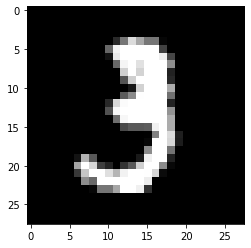

In [8]:
plt.imshow(x_train[10], cmap= plt.get_cmap('gray'))

### Model building using Multi-Layer Perceptron using MNIST Dataset.

**Import the required libraries**

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [10]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

# Reshaping the data
 

In [12]:

number_pix = x_train.shape[1] * x_train.shape[2] # 28 * 28 = 784 pixels



In [14]:
X_train = x_train.reshape(x_train.shape[0], number_pix).astype('float32')
X_test = x_test.reshape(x_test.shape[0], number_pix).astype('float32')

In [15]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 784), dtype('float32'), (10000, 784), dtype('float32'))

# Normalize the data

In [16]:
X_train = X_train / 255  # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255   # Scaling values from (0,255) -> (0,1)

# One-hot encoding for labels

In [19]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Build the MLP model

In [31]:
model = Sequential()
model.add(Dense(number_pix, input_shape=(number_pix,), activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the midel
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Run the MLP model

In [35]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs =10, batch_size = 200, verbose=2)
score = model.evaluate(X_test,Y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2788 - accuracy: 0.9215 - val_loss: 0.1469 - val_accuracy: 0.9574 - 5s/epoch - 16ms/step
Epoch 2/10
300/300 - 4s - loss: 0.1106 - accuracy: 0.9686 - val_loss: 0.0982 - val_accuracy: 0.9704 - 4s/epoch - 14ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0714 - accuracy: 0.9793 - val_loss: 0.0782 - val_accuracy: 0.9765 - 4s/epoch - 14ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0498 - accuracy: 0.9857 - val_loss: 0.0695 - val_accuracy: 0.9797 - 4s/epoch - 14ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0370 - accuracy: 0.9897 - val_loss: 0.0596 - val_accuracy: 0.9824 - 4s/epoch - 14ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0260 - accuracy: 0.9930 - val_loss: 0.0605 - val_accuracy: 0.9807 - 4s/epoch - 13ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0209 - accuracy: 0.9946 - val_loss: 0.0632 - val_accuracy: 0.9802 - 4s/epoch - 14ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0174 - accuracy: 0.9957 - val_loss: 0.0572 - val_accuracy: 0.9815 - 4s/epoch - 14ms/step
Epoch 9/10
300/3

# Summary

* With the MLP, we got error rate is of 1.84%. Means the accuract is about 99.84%.
* Lets see what will be the accuracy of MNIST digit classification by using CNN. [Chick here](https://github.com/ajju198821/Deep-Learning-Work/blob/main/MNIST_digit_classigication_by_CNN.ipynb) to look at it.